In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 3 option for print all columns in the dataframes
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import plotly.express as px
template = 'plotly_dark'

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/covid19-italy-regional-data/regioni-con-trento-bolzano.geojson
/kaggle/input/covid19-italy-regional-data/dpc-covid19-ita-regioni.csv
/kaggle/input/covid19-italy-regional-data/dpc-covid19-ita-province.csv


In [2]:
# import the dataset
dpc_covid19_ita_regioni = pd.read_csv("../input/covid19-italy-regional-data/dpc-covid19-ita-regioni.csv")

# rename the columns 
df = dpc_covid19_ita_regioni.rename(columns={'data':'date',
                                             'stato': 'country',
                                             'codice_regione': 'region_id',
                                             'denominazione_regione':'region',
                                             'ricoverati_con_sintomi':'hospitalized_with_symptoms',
                                             'terapia_intensiva':'intensive_therapy',
                                             'totale_ospedalizzati':'tot_hospitalized',
                                             'isolamento_domiciliare':'home_quarantine',
                                             'totale_attualmente_positivi':'tot_now_positive',
                                             'nuovi_attualmente_positivi':'new_positive',
                                             'dimessi_guariti':'recovered',
                                             'deceduti':'deaths',
                                             'totale_casi':'confirmed',
                                             'tamponi':'swabs'})

## Last Update
↓↓↓


In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + max(df['date']) + color.END)

2020-03-11 17:00:00


In [4]:
# convert the date from string in datetime format for time series analysis
df['date'] = pd.to_datetime(df['date'].str[:10],
format='%Y-%m-%d')
ita = df.copy()
df

,date,country,region_id,region,lat,long,hospitalized_with_symptoms,intensive_therapy,tot_hospitalized,home_quarantine,tot_now_positive,new_positive,recovered,deaths,confirmed,swabs
0,2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
5,2020-02-24,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148
6,2020-02-24,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,58
7,2020-02-24,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124
8,2020-02-24,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,1
9,2020-02-24,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463


In [5]:
# import the dataset
dpc_covid19_ita_province = pd.read_csv("../input/covid19-italy-regional-data/dpc-covid19-ita-province.csv")
dpc_covid19_ita_province[dpc_covid19_ita_province['denominazione_provincia']=='Torino']

prov = dpc_covid19_ita_province.rename(columns={'data':'date',
                                             'stato': 'country',
                                             'codice_regione': 'region_id',
                                             'denominazione_regione':'region',
                                             'codice_provincia':'province_id',
                                             'denominazione_provincia':'province',
                                             'sigla_provincia':'province_code',
                                             'totale_casi':'confirmed'})
# Delete these row indexes from dataFrame
prov.drop(prov[ prov['date'] ==  'data' ].index , inplace=True)
prov.drop(prov[ prov['province_code'].isnull()].index , inplace=True)
prov['confirmed'] = prov['confirmed'].astype(int)
prov['lat'] = prov['lat'].astype(float)
prov['long'] = prov['long'].astype(float)
prov['date'] = pd.to_datetime(prov['date'].str[:10],format='%Y-%m-%d')

# prov.groupby(by=['region']).sum()
#
prov
# prov['confirmed'] = prov.groupby(['region']).cumsum()
# prov[prov['date'] == max(prov['date'])]

,date,country,region_id,region,province_id,province,province_code,lat,long,confirmed
0,2020-02-24,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
5,2020-02-24,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0
...,...,...,...,...,...,...,...,...,...,...
2170,2020-03-11,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,14
2171,2020-03-11,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,185
2172,2020-03-11,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,179
2173,2020-03-11,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,110


# An overview on Italy 

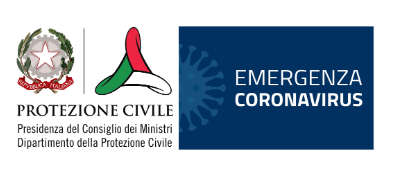

The Dipartimento della Protezione Civile, uploads everyday at 18:30 an update on the spread of the Covid-19 in Italy.

You can found the raw data used in this analysis following the link: -> https://github.com/pcm-dpc/COVID-19

## Scope

This work tries to provide the reader the right data vizualization tools for boost the comprehension of the global and local spread of the Covid-19.

Predictive models and other analysis will be given in the next few days.

In [6]:
# select the last and most updated data from the dataset for statistics and display it
df_max = df[df['date']==max(df['date'])].sort_values(['confirmed'], ascending=[False])

df_max.columns

Index(['date', 'country', 'region_id', 'region', 'lat', 'long', 'hospitalized_with_symptoms', 'intensive_therapy', 'tot_hospitalized', 'home_quarantine', 'tot_now_positive', 'new_positive', 'recovered', 'deaths', 'confirmed', 'swabs'], dtype='object')

Here, an overview of the main insight from the dataset is given

In [7]:
ita = ita.groupby(by=['date'], as_index=False).sum().sort_values(['date'], ascending=[True])
ita = ita.rename(columns={'region_code':'country'})
ita['country'] = 'ITA'
ita[['date', 'country','confirmed','recovered','deaths']].sort_values(['date'], ascending=[False])

,date,country,confirmed,recovered,deaths
16,2020-03-11,ITA,12462,1045,827
15,2020-03-10,ITA,10149,1004,631
14,2020-03-09,ITA,9172,724,463
13,2020-03-08,ITA,7375,622,366
12,2020-03-07,ITA,5883,589,233
11,2020-03-06,ITA,4636,523,197
10,2020-03-05,ITA,3858,414,148
9,2020-03-04,ITA,3089,276,107
8,2020-03-03,ITA,2502,160,79
7,2020-03-02,ITA,2036,149,52


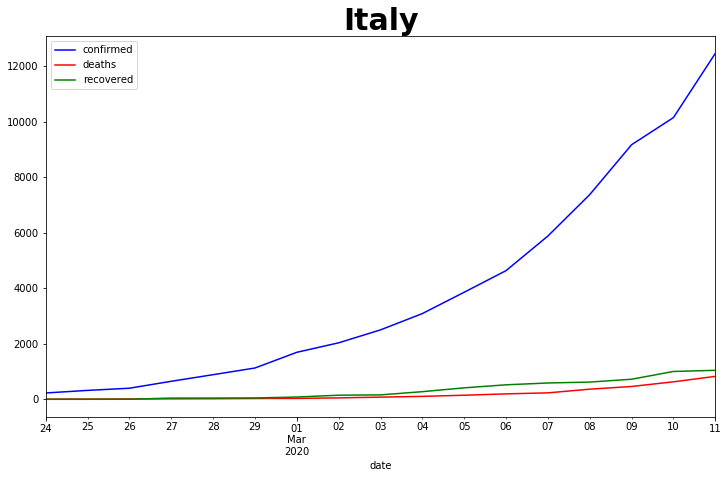

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,7))

# gca stands for 'get current axis'
ax = plt.gca()

ita.plot(x ='date', y='confirmed', color='blue', kind = 'line',ax=ax)
ita.plot(x ='date', y='deaths', color='red', kind = 'line',ax=ax)
ita.plot(x ='date', y='recovered', color='green', kind = 'line',ax=ax)

plt.legend(['confirmed', 'deaths','recovered'], loc='upper left')
plt.rcParams['figure.facecolor'] = 'xkcd:white'

dict_style_title = {'fontsize':30,
                    'fontweight' : 'bold',
                    'color' : 'black',
                    'verticalalignment': 'baseline'}

plt.title('Italy', fontdict = dict_style_title)
plt.show()

In [9]:
df2 = df.copy()
# convert date in the target format for plotting the map
df2['date'] = df2['date'].dt.strftime('%m/%d/%Y')
df[df['date']==max(df['date'])][['date','region','confirmed','deaths','recovered']].sort_values(['confirmed'], ascending=[False])

,date,region,confirmed,deaths,recovered
345,2020-03-11,Lombardia,7280,617,900
341,2020-03-11,Emilia Romagna,1739,113,38
356,2020-03-11,Veneto,1023,29,54
348,2020-03-11,Piemonte,501,21,0
346,2020-03-11,Marche,479,18,0
352,2020-03-11,Toscana,320,1,5
344,2020-03-11,Liguria,194,8,5
340,2020-03-11,Campania,154,1,4
343,2020-03-11,Lazio,150,6,19
342,2020-03-11,Friuli V. G.,126,6,10


In [10]:
fig = px.scatter_geo(df2, 
                     lat = df2["lat"].astype(str), lon = df2["long"].astype(str),
                     color="confirmed", size="confirmed", hover_name="region", 
                     range_color= [0, max(df2['confirmed'])+2],  color_continuous_scale='Bluered',
                     projection="natural earth", animation_frame="date", scope = 'europe', height = 700, size_max  = 70,# template = template,
                     title='Spread in Italy over time: Regions')



fig.show()

In [11]:
dfp = prov.copy()
# convert date in the target format for plotting the map
dfp['date'] = dfp['date'].dt.strftime('%m/%d/%Y')

In [12]:
# for now unused
# link source data: -> https://gist.github.com/datajournalism-it/f1abb68e718b54f6a0fe
import geojson
with open("../input/covid19-italy-regional-data/regioni-con-trento-bolzano.geojson") as f:
    gj = geojson.load(f)
gj["features"][0]

{"geometry": {"coordinates": [[[[7.588572, 45.970751], [7.589812, 45.97073], [7.591398, 45.970768], [7.596241, 45.970683], [7.603777, 45.970227], [7.604774, 45.970122], [7.606872, 45.969832], [7.609904, 45.969374], [7.610872, 45.969899], [7.61339, 45.970902], [7.616986, 45.972124], [7.61839, 45.972267], [7.619837, 45.972195], [7.621394, 45.97189], [7.622731, 45.9716], [7.626187, 45.971191], [7.632423, 45.9706], [7.637876, 45.97035], [7.639219, 45.970321], [7.640403, 45.97047], [7.642058, 45.970913], [7.643556, 45.971408], [7.647056, 45.972889], [7.650507, 45.974307], [7.65509, 45.975882], [7.656846, 45.976398], [7.657886, 45.976626], [7.659343, 45.976184], [7.662231, 45.975804], [7.663709, 45.975551], [7.664361, 45.975262], [7.668328, 45.97295], [7.673347, 45.967077], [7.673832, 45.966255], [7.680119, 45.958038], [7.681262, 45.957179], [7.687787, 45.955175], [7.689638, 45.954944], [7.694308, 45.955006], [7.696525, 45.955095], [7.69733, 45.954888], [7.702549, 45.953525], [7.708227, 45.9

In [13]:
# it can be defined either with color_continuous_scale=px.colors.sequential.Bluered
# for revere the color scheme simply append _r at the end of the name of the color schema  .ex  'Bluered_r'
# style informations: -> https://plot.ly/python/map-configuration/

#     Valid properties:
#         bgcolor
#             Set the background color of the map
#         center
#             plotly.graph_objects.layout.geo.Center instance or dict
#             with compatible properties
#         coastlinecolor
#             Sets the coastline color.
#         coastlinewidth
#             Sets the coastline stroke width (in px).
#         countrycolor
#             Sets line color of the country boundaries.
#         countrywidth
#             Sets line width (in px) of the country boundaries.
#         domain
#             plotly.graph_objects.layout.geo.Domain instance or dict
#             with compatible properties
#         fitbounds
#             Determines if this subplot's view settings are auto-
#             computed to fit trace data. On scoped maps, setting
#             `fitbounds` leads to `center.lon` and `center.lat`
#             getting auto-filled. On maps with a non-clipped
#             projection, setting `fitbounds` leads to `center.lon`,
#             `center.lat`, and `projection.rotation.lon` getting
#             auto-filled. On maps with a clipped projection, setting
#             `fitbounds` leads to `center.lon`, `center.lat`,
#             `projection.rotation.lon`, `projection.rotation.lat`,
#             `lonaxis.range` and `lonaxis.range` getting auto-
#             filled. If "locations", only the trace's visible
#             locations are considered in the `fitbounds`
#             computations. If "geojson", the entire trace input
#             `geojson` (if provided) is considered in the
#             `fitbounds` computations, Defaults to False.
#         framecolor
#             Sets the color the frame.
#         framewidth
#             Sets the stroke width (in px) of the frame.
#         lakecolor
#             Sets the color of the lakes.
#         landcolor
#             Sets the land mass color.
#         lataxis
#             plotly.graph_objects.layout.geo.Lataxis instance or
#             dict with compatible properties
#         lonaxis
#             plotly.graph_objects.layout.geo.Lonaxis instance or
#             dict with compatible properties
#         oceancolor
#             Sets the ocean color
#         projection
#             plotly.graph_objects.layout.geo.Projection instance or
#             dict with compatible properties
#         resolution
#             Sets the resolution of the base layers. The values have
#             units of km/mm e.g. 110 corresponds to a scale ratio of
#             1:110,000,000.
#         rivercolor
#             Sets color of the rivers.
#         riverwidth
#             Sets the stroke width (in px) of the rivers.
#         scope
#             Set the scope of the map.
#         showcoastlines
#             Sets whether or not the coastlines are drawn.
#         showcountries
#             Sets whether or not country boundaries are drawn.
#         showframe
#             Sets whether or not a frame is drawn around the map.
#         showlakes
#             Sets whether or not lakes are drawn.
#         showland
#             Sets whether or not land masses are filled in color.
#         showocean
#             Sets whether or not oceans are filled in color.
#         showrivers
#             Sets whether or not rivers are drawn.
#         showsubunits
#             Sets whether or not boundaries of subunits within
#             countries (e.g. states, provinces) are drawn.
#         subunitcolor
#             Sets the color of the subunits boundaries.
#         subunitwidth
#             Sets the stroke width (in px) of the subunits
#             boundaries.
#         uirevision
#             Controls persistence of user-driven changes in the view
#             (projection and center). Defaults to
#             `layout.uirevision`.
#         visible
#             Sets the default visibility of the base layers.

fig = px.scatter_geo(dfp, 
                     lat = dfp["lat"].astype(str), lon = dfp["long"].astype(str),
                     color="confirmed", size="confirmed", hover_name="province", 
                     range_color= [0, max(dfp['confirmed'])+2], color_continuous_scale='Bluered',
                     projection="natural earth", animation_frame="date", scope = 'europe', height = 700, size_max  = 70,# template = template,
                     title='Spread in Italy over time: Provinces')

# fig.update_geos(visible=True,oceancolor = 'grey',showocean = True, showland = False,countrycolor = 'white', countrywidth = 2, bgcolor ='black', showcountries = True, resolution = 50
#                ,lonaxis={"range":[30, 45]}, lataxis={"range":[37, 50]
    #)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})



fig.show()

# World comparison
The global situation is taken from the dataset [covid_19_clean_complete.csv](https://www.kaggle.com/imdevskp/corona-virus-report)

In [14]:
full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf.groupby(['Country/Region']).max().sort_values(['Confirmed'], ascending=[False]).head(10)  # commenta a cambia head (25) per vedere ad esempio i primi 25

,Date,Confirmed,Deaths,Recovered
Country/Region,,,,
China,2020-03-11,67773,3046,49134
Italy,2020-03-11,12462,827,1045
Iran,2020-03-11,9000,354,2959
"Korea, South",2020-03-11,7755,60,288
France,2020-03-11,2281,48,12
Spain,2020-03-11,2277,54,183
Germany,2020-03-11,1908,3,25
Cruise Ship,2020-03-11,706,7,325
Switzerland,2020-03-11,652,4,4


In [15]:
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(formated_gdf, 
                     locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='Confirmed', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], color_continuous_scale='Bluered',# template = template,
                     projection="natural earth", animation_frame="Date", size_max = 70, height=800,
                     title='Spread World wide over time')

fig.update_yaxes(automargin=True)
fig.show()